<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/7_2_DeepLearning_DataGen_3lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 7.2 Modelos de deep learning - DATA GENERATION com 3 labels

Para o conjunto de dados de treino aumentados via data generation, esta secção apresenta modelos de redes neuronais convolucionais (CNN), uma das opções mais utilizadas para a classificação de imagens. Inclui CNN:

  * não otimizadas
  * com API funcional Keras
  * com otimização de hiperparâmetros

### 7.2.1 CNN iniciais
De seguida são apresentadas CNN para classificar as imagens em:

  * 0 - COVID-19
  * 1 - Outra pneumonia 
  * 2 - Normal

In [ ]:
def build_model_CNN1(filters, kernel_size,dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(200, 200, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

O modelo abaixo difere do anterior por considerar múltiplos de filtros nas camadas convolucionais:

In [ ]:
def build_model_CNN2(filters, kernel_size, dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(200, 200, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(2*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(4*filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

O último modelo incorpora camadas de polling (avg and max), nem sempre intercaladas com camadas convolucionais, e ainda 2 camadas de dropout.

In [ ]:
def build_model_CNN3(labels):
  model = Sequential()  
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(200,200,1)))
  model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

**Versão 1**

O modelo seguinte é uma CNN com 3 camadas convolucionais de 64 filtros, intercaladas com camadas de pooling. Não são usadas camadas de dropout.

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 14s 3ms/step - loss: 0.9314 - accuracy: 0.6656 - val_loss: 0.7767 - val_accuracy: 0.7009
Epoch 2/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.4553 - accuracy: 0.8660 - val_loss: 0.4730 - val_accuracy: 0.8426
Epoch 3/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.2807 - accuracy: 0.9071 - val_loss: 0.5118 - val_accuracy: 0.7785
Epoch 4/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.2522 - accuracy: 0.9102 - val_loss: 0.3331 - val_accuracy: 0.8925
Epoch 5/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.2229 - accuracy: 0.9252 - val_loss: 0.3099 - val_accuracy: 0.9017
Epoch 6/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.2100 - accuracy: 0.9297 - val_loss: 0.3005 - val_accuracy: 0.9024
Epoch 7/50
5134/5134 [==============================] - 7s 1ms/step - loss: 0.1968 - ac

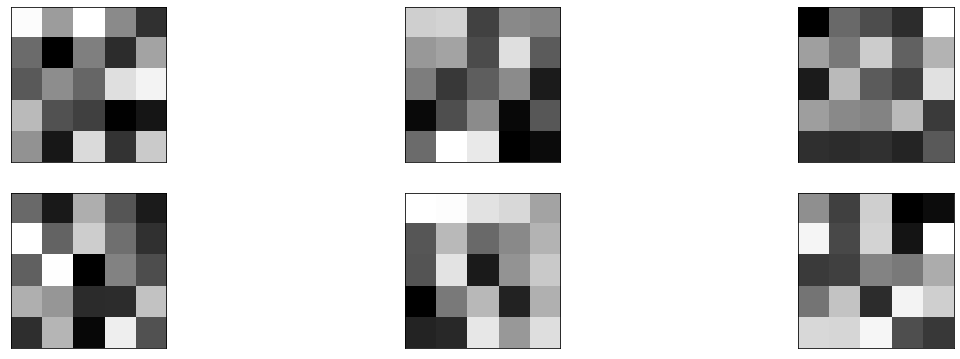

Predicted    0    1    2
Actual                  
0          189   24   18
1           10  855   66
2            4   25  815
accuracy total: 0.9267198404785643
precision covid: 0.9310344827586207
recall covid: 0.8181818181818182
precision total: 0.9277979301813551
recall total: 0.9007296585157114
label precision recall
    0     0.931  0.818
    1     0.946  0.918
    2     0.907  0.966
2006/2006 [==============================] - 1s 534us/step
[0.19137742143804032, 0.9267198443412781]


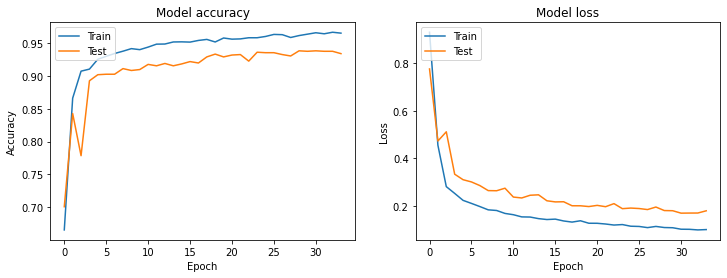

In [ ]:
model6=build_model_CNN1(64, 5, 0, 3)
history6=model6.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
model6.summary()
tf.keras.utils.plot_model(model6, "model6.png", show_shapes = True)
camadas(model6)
output_metrics(model6,history6,X_test2, y_test2)
model_save_name = 'model6_3.sav'
path = F"/content/{model_save_name}" 
torch.save(model6, path)

history_pickle.append(history6)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo apresenta uma **performance global de 92,7%**. Os gráficos da precisão e loss <u>não evidenciam apenas um ligeiro overfitting</u>.



---


**Versão 2**

Nesta versão é incluída uma camada de dropout de 50%:

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

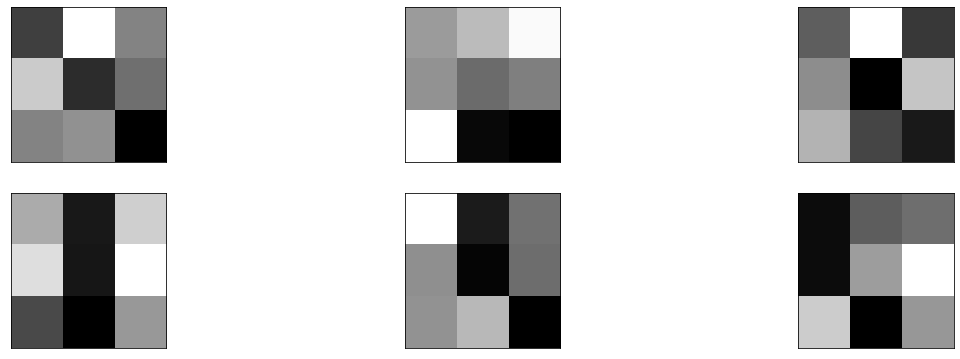

Predicted    0    1    2
Actual                  
0          214   13    4
1           13  898   20
2            7   45  792
accuracy total: 0.9491525423728814
precision covid: 0.9145299145299145
recall covid: 0.9264069264069265
precision total: 0.941482897919029
recall total: 0.9431165982496917
label precision recall
    0     0.915  0.926
    1     0.939  0.965
    2     0.971  0.938
2006/2006 [==============================] - 1s 594us/step
[0.14299896416641542, 0.9491525292396545]


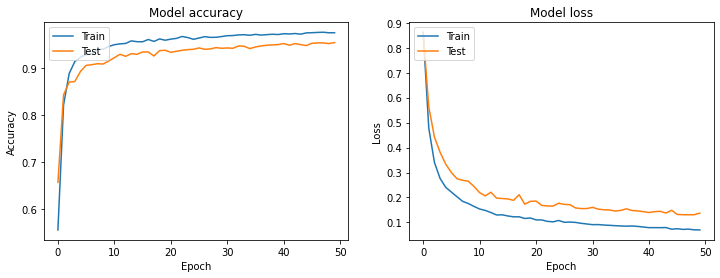

In [ ]:
model7=build_model_CNN1(64, 3, 0.5, 3)
history7=model7.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks, verbose=0)
model7.summary()
camadas(model7)
output_metrics(model7,history7,X_test2, y_test2)
model_save_name = 'model7.sav'
path = F"/content/{model_save_name}" 
torch.save(model7, path)
tf.keras.utils.plot_model(model7, "model7.png", show_shapes = True)

history_pickle.append(history7)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

A performance aumenta para 94,9%, reduzindo-se o overfitting.



---

**Versão 3**

Testa-se, a seguir, o poder preditivo da CNN2, sem dropout:

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 67712)            

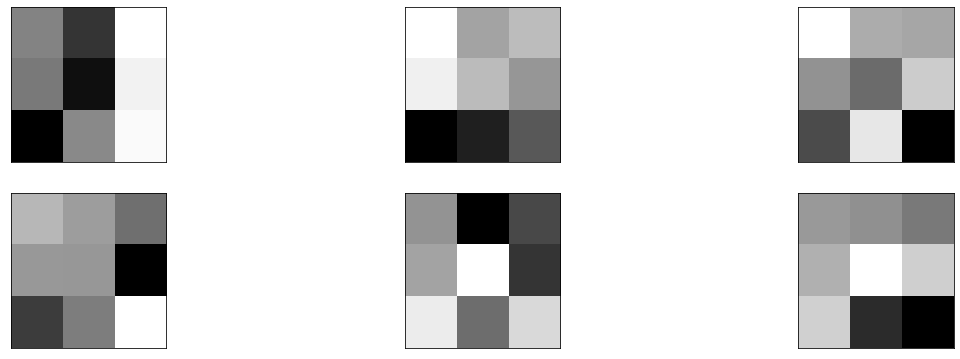

Predicted    0    1    2
Actual                  
0          214   12    5
1            9  897   25
2            4   41  799
accuracy total: 0.9521435692921236
precision covid: 0.9427312775330396
recall covid: 0.9264069264069265
precision total: 0.9502512084401605
recall total: 0.9455231732518552
label precision recall
    0     0.943  0.926
    1     0.944  0.963
    2     0.964  0.947
2006/2006 [==============================] - 1s 535us/step
[0.13904356582467245, 0.9521435499191284]


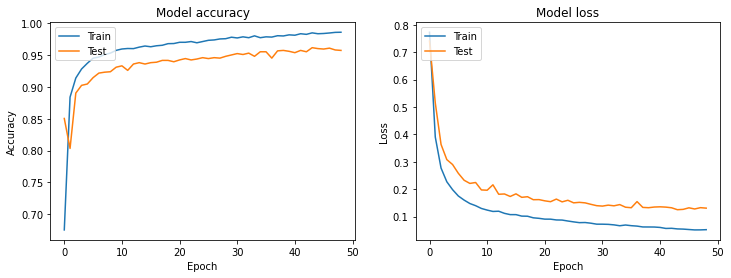

In [ ]:
model8=build_model_CNN2(32,3,0,3)
model8.summary()
history8=model8.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
camadas(model8)
output_metrics(model8,history8,X_test2, y_test2)
model_save_name = 'model8.sav'
path = F"/content/{model_save_name}" 
torch.save(model8, path)
tf.keras.utils.plot_model(model8, "model8.png", show_shapes = True)

history_pickle.append(history8)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

O modelo apresenta uma accuracy de 95,2%, com algum overfitting.



---

**Versão 4**

Testa-se, a seguir, o poder preditivo da CNN2, com 20% de dropout:

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 67712)            

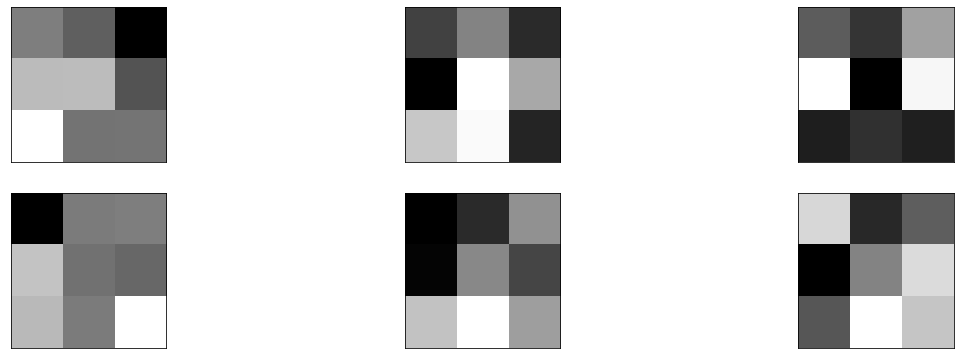

Predicted    0    1    2
Actual                  
0          205   17    9
1            8  896   27
2            4   41  799
accuracy total: 0.9471585244267199
precision covid: 0.9447004608294931
recall covid: 0.8874458874458875
precision total: 0.9469300142240323
recall total: 0.9321781223128193
label precision recall
    0     0.945  0.887
    1     0.939  0.962
    2     0.957  0.947
2006/2006 [==============================] - 1s 571us/step
[0.14749971673947387, 0.9471585154533386]


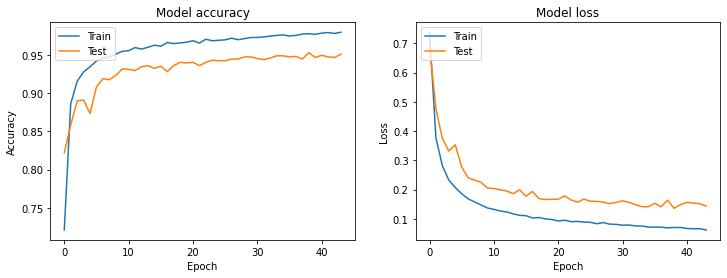

In [ ]:
model9=build_model_CNN2(32,3,0.2,3)
model9.summary()
history9=model9.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
camadas(model9)
output_metrics(model9,history9,X_test2, y_test2)
model_save_name = 'model9.sav'
path = F"/content/{model_save_name}" 
torch.save(model9, path)
tf.keras.utils.plot_model(model9, "model9.png", show_shapes = True)

history_pickle.append(history9)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)



---

**Versão 5**

Testa-se, a seguir, o poder preditivo da CNN3:

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 14s 3ms/step - loss: 0.7260 - accuracy: 0.6547 - val_loss: 0.5670 - val_accuracy: 0.8454
Epoch 2/50
5134/5134 [==============================] - 13s 3ms/step - loss: 0.3162 - accuracy: 0.8812 - val_loss: 0.3726 - val_accuracy: 0.8746
Epoch 3/50
5134/5134 [==============================] - 13s 3ms/step - loss: 0.2485 - accuracy: 0.9044 - val_loss: 0.3185 - val_accuracy: 0.8875
Epoch 4/50
5134/5134 [==============================] - 13s 3ms/step - loss: 0.2096 - accuracy: 0.9235 - val_loss: 0.3133 - val_accuracy: 0.8875
Epoch 5/50
5134/5134 [==============================] - 13s 3ms/step - loss: 0.1927 - accuracy: 0.9314 - val_loss: 0.2625 - val_accuracy: 0.9038
Epoch 6/50
5134/5134 [==============================] - 14s 3ms/step - loss: 0.1757 - accuracy: 0.9373 - val_loss: 0.2963 - val_accuracy: 0.8910
Epoch 7/50
5134/5134 [==============================] - 13s 3ms/step - loss: 0.163

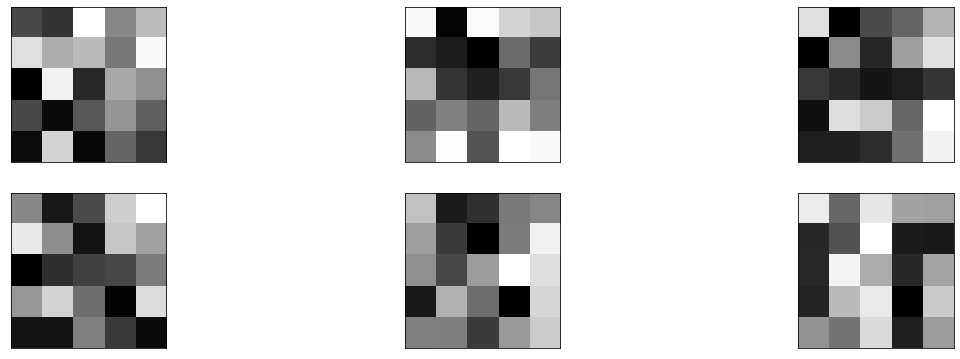

Predicted    0    1    2
Actual                  
0          217   11    3
1            8  883   40
2            1   24  819
accuracy total: 0.956630109670987
precision covid: 0.9601769911504425
recall covid: 0.9393939393939394
precision total: 0.9573888795918039
recall total: 0.9527385404073571
label precision recall
    0     0.960  0.939
    1     0.962  0.948
    2     0.950  0.970
2006/2006 [==============================] - 2s 835us/step
[0.14664513252281833, 0.9566301107406616]


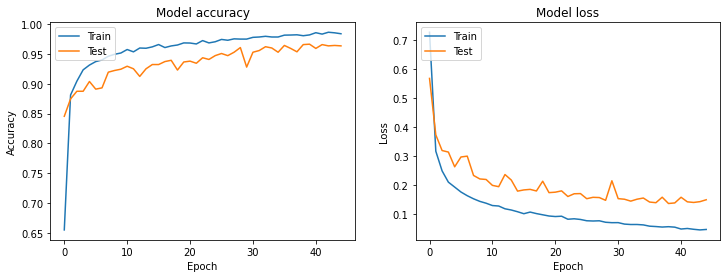

In [ ]:
model10=build_model_CNN3(3)
history10=model10.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
model10.summary()
camadas(model10)
output_metrics(model10,history10,X_test2, y_test2)
model_save_name = 'model10.sav'
path = F"/content/{model_save_name}" 
torch.save(model10, path)
tf.keras.utils.plot_model(model10, "model10.png", show_shapes = True)

history_pickle.append(history10)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

A performance global ronda os 95,7%. Não se verificam, assim, diferenças significativas entre os modelos testados.


### 7.2.2 CNN com API funcional

Esta secção inclui estruturas mais complexas (que as sequenciais) de CNN, recorrendo à API funcional do Keras. São testados múltiplos extratores de features, assim como de camadas fully-connected.

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers.merge import concatenate

def build_model_CNN_API_1(labels):
  visible = Input(shape=(200,200,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu')(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)    
  # prediction output
  output = Dense(labels, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def build_model_CNN_API_2(labels):
  visible = Input(shape=(200,200,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu',)(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)
  hidden4 = Dense(16, activation='relu')(hidden3)
  hidden5 = Dense(32, activation='relu')(hidden4)
  hidden6 = Dense(16, activation='relu')(hidden5)
  hidden7 = Dense(8, activation='relu')(hidden6)

  hidden1_1 = Dense(128, activation='relu')(merge)
  hidden2_1 = Dense(64, activation='relu')(hidden1_1)
  hidden3_1 = Dense(32, activation='relu')(hidden2_1)
  hidden4_1 = Dense(32, activation='relu')(hidden3_1)

  concatenated = concatenate([hidden3, hidden4_1])

  output = Dense(labels, activation='sigmoid')(concatenated)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

**Versão 1**

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 11s 2ms/step - loss: 0.8495 - accuracy: 0.5894 - val_loss: 0.7323 - val_accuracy: 0.7443
Epoch 2/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.3547 - accuracy: 0.8771 - val_loss: 0.4243 - val_accuracy: 0.8697
Epoch 3/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.2547 - accuracy: 0.9153 - val_loss: 0.3547 - val_accuracy: 0.8860
Epoch 4/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.2127 - accuracy: 0.9277 - val_loss: 0.2989 - val_accuracy: 0.8953
Epoch 5/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.1892 - accuracy: 0.9381 - val_loss: 0.2792 - val_accuracy: 0.9067
Epoch 6/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.1768 - accuracy: 0.9402 - val_loss: 0.2627 - val_accuracy: 0.9131
Epoch 7/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.163

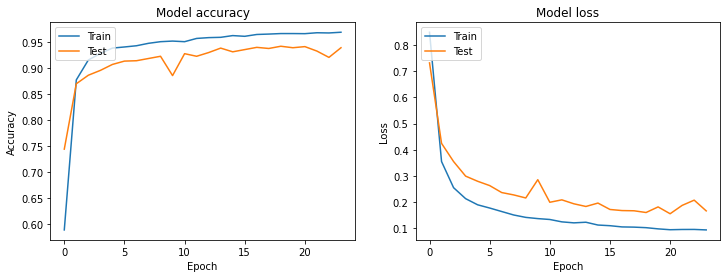

In [ ]:
model_CNN_API_1_3=build_model_CNN_API_1(3)
history_model_CNN_API_1_3=model_CNN_API_1_3.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
model_CNN_API_1_3.summary()
output_metrics(model_CNN_API_1_3,history_model_CNN_API_1_3,X_test2, y_test2)

model_save_name = 'model_CNN_API_1_3.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_1_3, path)
tf.keras.utils.plot_model(model_CNN_API_1_3, "model_CNN_API_1_3.png", show_shapes = True)

O modelo API1 apresenta uma performance de 92,8%, inferior às CNN iniciais. Revela ainda overfitting. 



---

**Versão 2**

Train on 5134 samples, validate on 1404 samples
Epoch 1/50
5134/5134 [==============================] - 11s 2ms/step - loss: 0.7398 - accuracy: 0.6482 - val_loss: 0.6405 - val_accuracy: 0.8155
Epoch 2/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.3337 - accuracy: 0.8938 - val_loss: 0.4522 - val_accuracy: 0.8483
Epoch 3/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.2411 - accuracy: 0.9172 - val_loss: 0.3318 - val_accuracy: 0.8868
Epoch 4/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.2083 - accuracy: 0.9258 - val_loss: 0.3004 - val_accuracy: 0.8996
Epoch 5/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.1881 - accuracy: 0.9346 - val_loss: 0.2716 - val_accuracy: 0.9060
Epoch 6/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.1667 - accuracy: 0.9447 - val_loss: 0.2452 - val_accuracy: 0.9131
Epoch 7/50
5134/5134 [==============================] - 10s 2ms/step - loss: 0.158

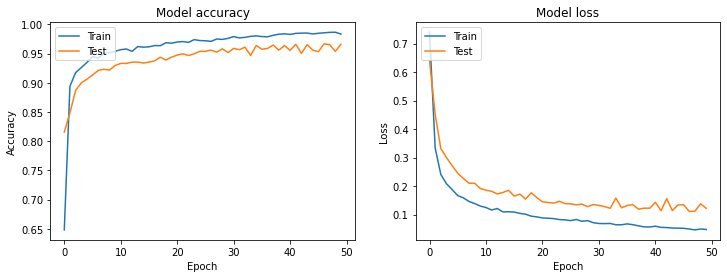

In [ ]:
model_CNN_API_2_3=build_model_CNN_API_2(3)
history_model_CNN_API_2_3=model_CNN_API_2_3.fit(X_train2, y_train2, epochs=50,validation_data=(X_val2,y_val2),callbacks = callbacks)
model_CNN_API_2_3.summary()
output_metrics(model_CNN_API_2_3,history_model_CNN_API_2_3,X_test2, y_test2)

model_save_name = 'model_CNN_API_2_3.sav'
path = F"/content/{model_save_name}" 
torch.save(model_CNN_API_2_3, path)
tf.keras.utils.plot_model(model_CNN_API_2_3, "model_CNN_API_2_3.png", show_shapes = True)

A API2 apresenta uma performance de 95,2%, em linha com as CNN.

Assim, a complexidade extra capturada pelas API não foi vantajosa em termos de predição global.

### 7.2.3. Otimização de hiperparâmetros

Os modelos anteriores apresentam performance interessante. Efetuar-se-á nesta secção um processo de **otimização de hipermparâmetros**, de modo a aumentar este valor, identificando quais os parâmetros mais adequados e que garantem uma precisão ótima.

Começamos por definir a função que alojará as várias topologias (convolucionais, pooling, dropout) e a taxa de dropout:

In [ ]:
def setup_model(topo_c, topo_p, dropout_rate, input_size, output_size):
  model = Sequential()
  model.add(Conv2D(topo_c[0], (3, 3), activation='relu', input_shape=(200,200,1)))
  if topo_p[0]==1: model.add(MaxPooling2D((2, 2)))
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  for i in range(1,len(topo_c)):
    model.add(Conv2D(topo_c[i], (3, 3), activation='relu'))
    if topo_p[i]==1: model.add(MaxPooling2D((2, 2)))
    if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(layers.Flatten())
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  return model

Na sequência define-se uma função que incorpora os vários algoritmos de treino, a loss e a métrica a usar, o número de epochs e o batch size:

In [ ]:
def train_cnn(model, alg, lr, Xtrain, Ytrain, epochs, batch_size):
  if alg == "adam":
    optimizer = optimizers.Adam(lr = lr)
  elif alg == "rmsprop":
    optimizer = optimizers.RMSprop(lr = lr)
  elif alg == "sgd_momentum":
   optimizer = optimizers.SGD(lr = lr, momentum = 0.9)
  else: optimizer = optimizers.SGD(lr = lr)

  model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
  history=model.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, verbose = 0,callbacks = callbacks)
  return model,history

A última função vai treinando os vários modelos, guardando configuração com a melhor performance:

In [ ]:
def cnn_optimization(opt_params, Xtrain, Ytrain, Xval, Yval, iterations, verbose = True):
  #verbose: producing detailed logging information
  from random import choice
  if verbose: print("Topology\tDropout\tAlgorithm\tLRate\tBatchSize\tEpochs\tValLoss\tValAcc\n")
  best_acc = None
  input_size = Xtrain.shape[0]
  output_size = Ytrain.shape[0]

  if "topology_c" in opt_params: topologies_c = opt_params["topology_c"]
  else: topologies_c = [[64,64,64]]
  if "topology_p" in opt_params: topologies_p = opt_params["topology_p"]
  else: topologies_p = [[1,1,1]]
  if "algorithm" in opt_params: algs = opt_params["algorithm"]
  else: algs = ["adam"]
  if "lr" in opt_params: lrs = opt_params["lr"]
  else: lrs = [0.001]
  if "dropout" in opt_params: dropouts = opt_params["dropout"]
  else: dropouts= [0.0]
  if "batch_size" in opt_params: batch_sizes = opt_params["batch_size"]
  else: batch_sizes= [512]
  if "epochs" in opt_params: epoch = opt_params["epochs"]
  else: epoch= [5]

  for it in range(iterations):
    #print('Iteração', it+1, 'de', iterations)
    #random item from the list
    topo_c = choice(topologies_c)
    topo_p = choice(topologies_p)   
    dropout_rate = choice(dropouts)
    dnn = setup_model (topo_c,topo_p, dropout_rate, input_size, output_size)
    alg = choice(algs)
    lr = choice(lrs)
    bs=choice(batch_sizes)
    epo=choice(epoch)

    dnn, history = train_cnn(dnn, alg, lr, Xtrain, Ytrain, epo, bs)
    val_loss, val_acc = dnn.evaluate(Xval, Yval, verbose = 0)
    if verbose:
      print(topo_c, "\t", topo_p, "\t", dropout_rate, "\t", alg, "\t", lr, "\t", bs, "\t", epo, "\t", val_loss, "\t", val_acc)
    if best_acc is None or val_acc > best_acc:
      best_acc = val_acc
      best_config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo)
      best_model=dnn
      best_history=history
    return best_config, best_acc,best_model,best_history

Listam-se os hiperparâmetros a otimizar:

In [ ]:
opt_pars = {
     "topology_c":[[64,64,64], [32,64,128], [64,64,64,128,128]],
     "topology_p":[[1,1,1,1,1], [1,0,1,0,1]],#pooling constante ou intercalado
     "algorithm": ["adam","RMSprop"],
     "lr": [0.001, 0.0001], 
     "dropout": [0, 0.2],
     "batch_size":  [64],
     "epochs":[10]}

E inicia-se o treino dos modelos e a seleção do mais preditivo:

In [ ]:
best_config, best_val_acc,best_model,best_history=cnn_optimization(opt_pars, X_train2, y_train2, X_val2, y_val2, 10,verbose = True)

Topology	Dropout	Algorithm	LRate	BatchSize	Epochs	ValLoss	ValAcc



/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


[64, 64, 64, 128, 128] 	 [1, 0, 1, 0, 1] 	 0 	 adam 	 0.0001 	 64 	 10 	 0.174415387765125 	 0.9444444179534912
[64, 64, 64, 128, 128] 	 [1, 0, 1, 0, 1] 	 0 	 adam 	 0.001 	 64 	 10 	 0.1576717242258906 	 0.9551281929016113
[64, 64, 64, 128, 128] 	 [1, 1, 1, 1, 1] 	 0 	 RMSprop 	 0.0001 	 64 	 10 	 1.1105572647518582 	 0.12464387714862823
[32, 64, 128] 	 [1, 0, 1, 0, 1] 	 0.2 	 RMSprop 	 0.001 	 64 	 10 	 0.3817639343249492 	 0.8881766200065613
[64, 64, 64, 128, 128] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.0001 	 64 	 10 	 0.34287299924766235 	 0.8945869207382202
[64, 64, 64] 	 [1, 0, 1, 0, 1] 	 0 	 RMSprop 	 0.0001 	 64 	 10 	 1.0245376737029463 	 0.4850427210330963
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.001 	 64 	 10 	 0.18892058698285338 	 0.938034176826477
[32, 64, 128] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.001 	 64 	 10 	 0.18364257297539643 	 0.9358974099159241
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.001 	 64 	 10 	 0.14946793917662057 	 0.9558404684066772
[64, 64, 64, 1

Das hipóteses testadas, identifica-se como mais preditivo um modelo com:
* 3 camadas convolucionais de 64 filtros, intercaladas com camadas de pooling
* 20% de dropout
* algoritmo de treino: Adam
* velocidade de aprendizagem: 0.001

Treina-se de seguida a melhor configuração identificada para o modelo num conjunto de dados que engloba os dados de treino e validação.

In [ ]:
#unir treino e validação para uma última corrida com o modelo ótimo
X_train_total=np.append(X_train2,X_val2)
y_train_total=np.append(y_train2,y_val2)
X_train_total=X_train_total.reshape(X_train2.shape[0]+X_val2.shape[0],200,200,1)
y_train_total=y_train_total.reshape(y_train2.shape[0]+y_val2.shape[0],)
print(X_train2.shape )
print(X_val2.shape )
print(X_train_total.shape)
print(y_train_total.shape)

(5134, 200, 200, 1)
(1404, 200, 200, 1)
(6538, 200, 200, 1)
(6538,)


In [ ]:
print("Best configuration:", best_config)
print("Best validation accuracy:", best_val_acc)
best_model = setup_model(best_config[0], best_config[1],best_config[2], X_train2.shape[0],y_train2.shape[0])
best_model, best_history = train_cnn(best_model, best_config[3], best_config[4], X_train_total,y_train_total,best_config[5],10)
test_loo, test_acc = best_model.evaluate(X_test2, y_test2, verbose = 0)
print("Test set metrics:", test_loo, test_acc)


Best configuration: ([64, 64, 64], [1, 1, 1, 1, 1], 0.2, 'adam', 0.001, 64, 10)
Best validation accuracy: 0.9558404684066772


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Test set metrics: 0.2451196844661808 0.9661017060279846


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 46, 46, 64)      

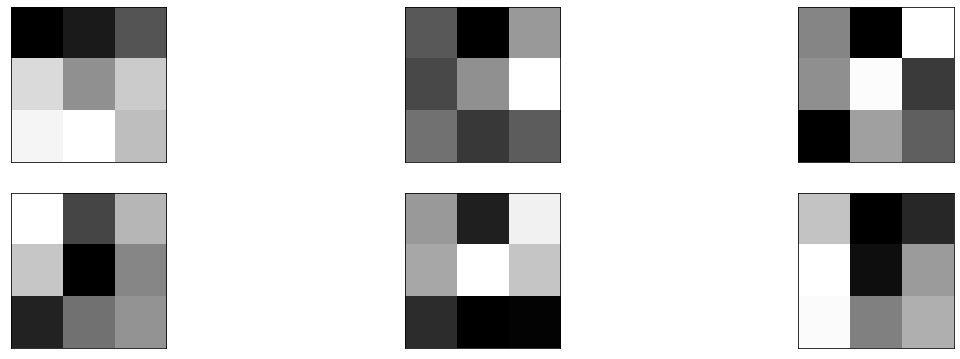

Predicted    0    1    2
Actual                  
0          217    9    5
1            5  899   27
2            3   19  822
accuracy total: 0.9661016949152542
precision covid: 0.9644444444444444
recall covid: 0.9393939393939394
precision total: 0.965589585401777
recall total: 0.9596519817629464
label precision recall
    0     0.964  0.939
    1     0.970  0.966
    2     0.963  0.974
2006/2006 [==============================] - 1s 531us/step
[0.2451196844661808, 0.9661017060279846]


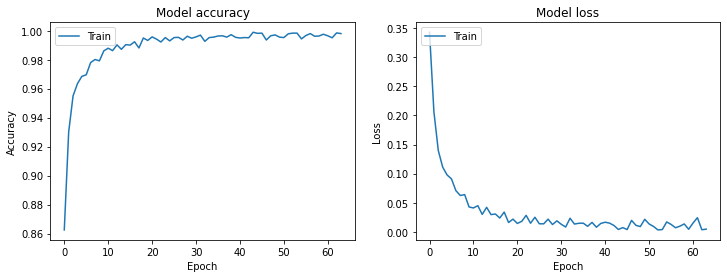

In [ ]:
best_model.summary()
camadas(best_model)
output_metrics2(best_model,best_history,X_test2, y_test2)

In [ ]:
model_save_name = 'best_model.sav'
path = F"/content/{model_save_name}" 
torch.save(best_model, path)
tf.keras.utils.plot_model(best_model, "best_model.png", show_shapes = True)

O modelo dinal, avaliado no conjunto de teste, apresenta uma **performance global de 96,6%**, identificando **93,9% dos casos COVID-19**.

O maior erro está associado a pacientes com pneumonia viral ou bacteriana classificados como normais. 

### 7.2.4. Comparação de resultados

O gráfico abaixo compara a evolução da accuracye loss pelas epochs para os modelos testados.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


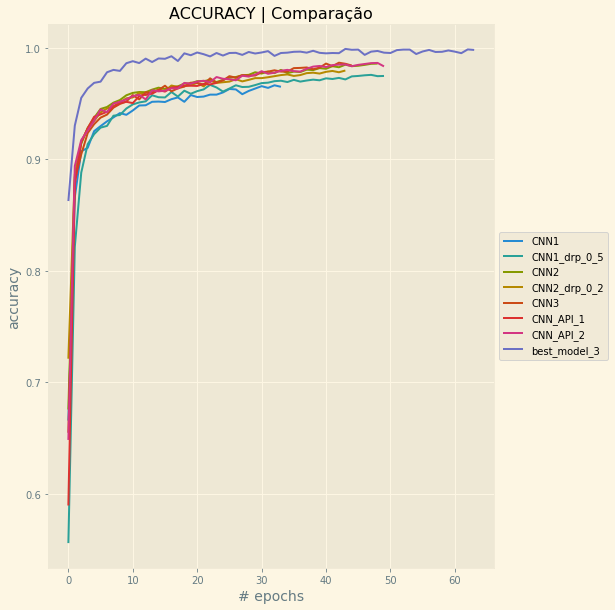

In [ ]:
with plt.style.context('Solarize_Light2'):
    plt.plot((history6.history['accuracy']),label='CNN1')
    plt.plot((history7.history['accuracy']),label='CNN1_drp_0_5')
    plt.plot((history8.history['accuracy']),label='CNN2')
    plt.plot((history9.history['accuracy']),label='CNN2_drp_0_2')
    plt.plot((history10.history['accuracy']),label='CNN3')
    plt.plot((history_model_CNN_API_1_3.history['accuracy']),label='CNN_API_1')
    plt.plot((history_model_CNN_API_2_3.history['accuracy']),label='CNN_API_2')
    plt.plot((best_history.history['accuracy']),label='best_model_3')

    plt.title('ACCURACY | Comparação')
    plt.xlabel('# epochs', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(loc='best')

plt.show()

O modelo ótimo aparece destacado. Não são visíveis diferenças significativas entre os modelos CNN e API testados.